# IPython Magic Commands

IPython has a system of commands we call 'magics' that provide effectively a mini command language that is orthogonal to the syntax of Python and is extensible by the user with new commands. Magics are meant to be typed interactively, so they use command-line conventions, such as using whitespace for separating arguments, dashes for options and other conventions typical of a command-line environment.

Magics come in two kinds:

Line magics: these are commands prepended by one % character and whose arguments only extend to the end of the current line.

Cell magics: these use two percent characters as a marker (%%), and they receive as argument both the current line where they are declared and the whole body of the cell.

In [1]:
# brings up a documentation pane with an overview of IPython's feature
?

In [2]:
# quick reference guide
%quickref

In [3]:
# use the ! operator to run system shell commands
!ping www.google.com

ping: icmp open socket: Operation not permitted


In [4]:
# several ways to interactively access help documentation
help

Type help() for interactive help, or help(object) for help about object.

In [5]:
# help module for magic commands
%magic

In [6]:
# list of all available magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [7]:
# bring up the help module for a specific command
%timeit?

In [8]:
# the ? syntax also works for any generic object
x = 5
x?

In [10]:
# run a python script from within the notebook
%run ~/scripts/hello

Hello world!


In [11]:
# debug a statement either in-line or after the fact
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [12]:
# time the execution of a statement
import numpy as np
%timeit np.linalg.eigvals(np.random.rand(100,100))

100 loops, best of 3: 15.5 ms per loop


In [13]:
# additional magic can be loaded using load_ext
%load_ext Cython

In [14]:
# list all environment variables or specific variables
%env SYSTEMROOT

UsageError: Environment does not have key: SYSTEMROOT


In [15]:
# print the cache of previously executed commands
%history

# brings up a documentation pane with an overview of IPython's feature
?
# quick reference guide
%quickref
# use the ! operator to run system shell commands
!ping www.google.com
# several ways to interactively access help documentation
help
# help module for magic commands
%magic
# list of all available magic commands
%lsmagic
# bring up the help module for a specific command
%timeit?
# the ? syntax also works for any generic object
x = 5
x?
# run a python script from within the notebook
%run scripts/hello
# run a python script from within the notebook
%run ~/scripts/hello
# debug a statement either in-line or after the fact
%debug
# time the execution of a statement
import numpy as np
%timeit np.linalg.eigvals(np.random.rand(100,100))
# additional magic can be loaded using load_ext
%load_ext Cython
# list all environment variables or specific variables
%env SYSTEMROOT
# print the cache of previously executed commands
%history


In [16]:
# set matplotlib to inline or interactive (qt) mode
%matplotlib inline

In [17]:
# print the call signature for any object
import urllib
%pdef urllib.urlopen

Object `urllib.urlopen` not found.


In [18]:
# print the docstring for a class/callable object
%pdoc urllib

No documentation found for urllib


In [19]:
# print all interactive variables
%who

np	 urllib	 x	 


In [20]:
# same as who but more information
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
urllib     module    <module 'urllib' from '/u<...>n3.6/urllib/__init__.py'>
x          int       5


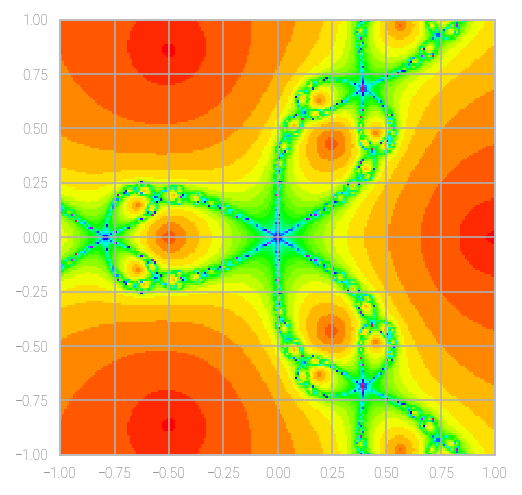

In [21]:
# example using cProfile
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1

def fprime(x):
    return 3*x**2

def newton(z, f, fprime, max_iter=100, tol=1e-6):
    """The Newton-Raphson method."""
    for i in range(max_iter):
        step = f(z)/fprime(z)
        if abs(step) < tol:
            return i, z
        z -= step
    return i, z

def plot_newton_iters(p, pprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    """Shows how long it takes to converge to a root using the Newton-Raphson method."""
    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            m[s, r] = newton(z, p, pprime)[0]
    plt.imshow(m, cmap=cmap, extent=extent)

stats = %prun -r -q plot_newton_iters(f, fprime)

In [22]:
stats.sort_stats('time').print_stats(10)

         1066933 function calls (1066269 primitive calls) in 1.309 seconds

   Ordered by: internal time
   List reduced from 542 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    40000    0.426    0.000    0.979    0.000 <ipython-input-21-7c9252f37475>:10(newton)
   324388    0.250    0.000    0.250    0.000 <ipython-input-21-7c9252f37475>:4(f)
        1    0.233    0.233    1.309    1.309 <ipython-input-21-7c9252f37475>:19(plot_newton_iters)
   324388    0.227    0.000    0.227    0.000 <ipython-input-21-7c9252f37475>:7(fprime)
   324392    0.077    0.000    0.077    0.000 {built-in method builtins.abs}
     1558    0.005    0.000    0.005    0.000 {built-in method numpy.core.multiarray.array}
      201    0.005    0.000    0.009    0.000 function_base.py:25(linspace)
      837    0.004    0.000    0.006    0.000 weakref.py:102(__init__)
     3845    0.003    0.000    0.003    0.000 __init__.py:934(__getitem__)
       96    0.0

In [23]:
# reset the namespace
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
